# 项目：数字营销转化数据分析

## 目标

**客户转化预测**：利用数据建立模型，预测客户转化的可能性。

**渠道与活动分析**：评估不同营销渠道和活动类型对客户转化的影响。

**关键因素识别**：分析哪些因素最能促进客户的参与度和转化率。

**广告与策略优化**：基于分析结果，调整广告支出和营销策略，以提升ROI。

## 背景
在数字化时代，企业越来越依赖于精准的数据分析来优化营销策略。本数据集通过整合客户基本信息、营销活动反馈、客户互动行为和历史交易记录，帮助营销人员深入理解消费者行为，从而制定更有效的市场定位和推广计划。数据集记录了客户与数字营销活动的互动情况。它涵盖了人口统计数据、营销特定指标、客户参与度指标以及历史购买数据，为数字营销领域的预测建模和分析提供了丰富的信息。

数据每列含义如下：

CustomerID：每个客户的唯一标识符。                     
Age：客户的年龄。                             
Gender：客户的性别（男性/女性）                 
Income：客户的年收入，以美元计                
CampaignChannel：营销活动传递的渠道：电子邮件(Email)、社交媒体(Social Media)、搜索引擎优化(SEO)、付费点击(PPC)、推荐(Referral)）。 
CampaignType：营销活动的类型：意识(Awareness)、考虑(Consideration)、转化(Conversion)、留存(Retention)。

AdSpend：在营销活动上的花费，以美元计。          
ClickThroughRate：客户点击营销内容的比率。               
ConversionRate：点击转化为期望行为（如购买）的比率。   
AdvertisingPlatform：广告平台：保密。                         
AdvertisingTool：广告工具：保密。                         
WebsiteVisits：访问网站的总次数。                       
PagesPerVisit：每次会话平均访问的页面数。             
TimeOnSite：每次访问平均在网站上花费的时间（分钟）。

SocialShares：营销内容在社交媒体上被分享的次数。     
EmailOpens：营销电子邮件被打开的次数。               
EmailClicks：营销电子邮件中链接被点击的次数。         
PreviousPurchases：客户之前进行的购买次数。               
LoyaltyPoints：客户累积的忠诚度积分数。               
Target Variable：目标变量：二元变量，表示客户是否转化（1）或未转化（0）。 

## 读取数据

导入数据分析所需要的库，并通过pandas的read_csv函数，将原始数据文件“digital_marketing_campaign_dataset.csv”里的数据内容，解析为DataFrame，并赋值变量original_data。

In [1]:
import pandas as pd

In [2]:
original_data = pd.read_csv("digital_marketing_campaign_dataset.csv")

In [3]:
original_data.head()

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
0,8000,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688,IsConfid,ToolConfid,1
1,8001,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459,IsConfid,ToolConfid,1
2,8002,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337,IsConfid,ToolConfid,1
3,8003,32,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463,IsConfid,ToolConfid,1
4,8004,60,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345,IsConfid,ToolConfid,1


## 评估数据

在这一部分，我将对上一部分简历的original_data这个DataFrame多包含的数据进行评估。

评估主要从两个方面进行：结构和内容，即整齐度和干净度。数据的结构性问题指符合“每列是一个变量，每行是一个观察值，每个单元格是一个值”这三个标准，数据的内容性问题包括存在丢失数据、重复数据、无效数据等。

### 评估数据整齐度

In [4]:
original_data.sample(10)

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
4670,12670,65,Female,33936,Referral,Consideration,9515.843413,0.120387,0.036684,27,5.586746,7.035842,38,9,6,9,4357,IsConfid,ToolConfid,1
789,8789,46,Male,78391,Social Media,Awareness,373.402123,0.286909,0.178064,49,9.119482,6.268574,5,4,3,5,3484,IsConfid,ToolConfid,1
5729,13729,40,Male,136193,Referral,Consideration,7999.231988,0.143539,0.147028,43,6.905612,13.970480,79,13,4,7,1350,IsConfid,ToolConfid,1
7939,15939,45,Female,111650,SEO,Conversion,2050.637232,0.018878,0.190188,25,2.827362,7.306056,16,15,2,7,4218,IsConfid,ToolConfid,1
7810,15810,52,Male,128988,Social Media,Conversion,9159.947948,0.134493,0.114169,25,8.844189,7.779849,90,3,3,6,3331,IsConfid,ToolConfid,0
4137,12137,59,Female,46691,PPC,Awareness,4888.550356,0.070586,0.173587,14,7.903400,7.008149,29,10,6,8,727,IsConfid,ToolConfid,1
816,8816,44,Female,95172,Social Media,Consideration,6730.020544,0.185553,0.101039,17,1.194750,6.615439,3,18,3,2,3114,IsConfid,ToolConfid,1
995,8995,60,Male,59585,Referral,Conversion,8350.410265,0.224501,0.116591,10,3.803617,0.931951,97,19,1,0,2229,IsConfid,ToolConfid,1
6489,14489,59,Female,108061,Referral,Conversion,6516.868531,0.245837,0.182900,35,3.481314,6.863646,63,2,3,4,4647,IsConfid,ToolConfid,1
2382,10382,42,Male,96325,Referral,Retention,8181.076935,0.265151,0.101410,27,3.594461,2.600667,64,5,9,3,1600,IsConfid,ToolConfid,1


从抽样的10行数据来看，数据符合“每列是一个变量，每行是一个观察值，每个单元格是一个值”，具体来看每行是关于某客户与数字营销活动的互动情况，每列是相关的各个变量，因此不存在结构性问题。

### 评估数据干净度

In [5]:
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           8000 non-null   int64  
 1   Age                  8000 non-null   int64  
 2   Gender               8000 non-null   object 
 3   Income               8000 non-null   int64  
 4   CampaignChannel      8000 non-null   object 
 5   CampaignType         8000 non-null   object 
 6   AdSpend              8000 non-null   float64
 7   ClickThroughRate     8000 non-null   float64
 8   ConversionRate       8000 non-null   float64
 9   WebsiteVisits        8000 non-null   int64  
 10  PagesPerVisit        8000 non-null   float64
 11  TimeOnSite           8000 non-null   float64
 12  SocialShares         8000 non-null   int64  
 13  EmailOpens           8000 non-null   int64  
 14  EmailClicks          8000 non-null   int64  
 15  PreviousPurchases    8000 non-null   i

从输出结果来看，数据共有8000条观察值，不存在缺失值。
此外，CustomerID的数据类型应为字符串，应当进行数据格式转换。

### 评估缺失数据

从输出结果来看，不存在缺失值。

### 评估重复数据

根据数据变量的含义来看，虽然CustomerID是唯一标识符，但不同的客户可能偏好相同的营销渠道、归属相同的营销类型，因此CustomerID可以存在重复。
那么针对此数据集，我们无须评估重复数据。

### 评估不一致数据

In [6]:
original_data["Gender"].value_counts()

Female    4839
Male      3161
Name: Gender, dtype: int64

In [7]:
original_data["CampaignType"].value_counts()

Conversion       2077
Awareness        1988
Consideration    1988
Retention        1947
Name: CampaignType, dtype: int64

In [8]:
original_data["CampaignType"].value_counts()

Conversion       2077
Awareness        1988
Consideration    1988
Retention        1947
Name: CampaignType, dtype: int64

In [9]:
original_data["AdvertisingPlatform"].value_counts()

IsConfid    8000
Name: AdvertisingPlatform, dtype: int64

In [10]:
original_data["AdvertisingTool"].value_counts()

ToolConfid    8000
Name: AdvertisingTool, dtype: int64

从输出结果看，不存在不一致数据

### 评估无效或错误数据

可以通过DataFrame的describe方法，对数值统计信息快速了解

In [11]:
original_data.describe()

,CustomerID,Age,Income,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,Conversion
count,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,11999.50000,43.625500,84664.196750,5000.944830,0.154829,0.104389,24.751625,5.549299,7.727718,49.799750,9.476875,4.467375,4.485500,2490.268500,0.876500
std,2309.54541,14.902785,37580.387945,2838.038153,0.084007,0.054878,14.312269,2.607358,4.228218,28.901165,5.711111,2.856564,2.888093,1429.527162,0.329031
min,8000.00000,18.000000,20014.000000,100.054813,0.010005,0.010018,0.000000,1.000428,0.501669,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9999.75000,31.000000,51744.500000,2523.221165,0.082635,0.056410,13.000000,3.302479,4.068340,25.000000,5.000000,2.000000,2.000000,1254.750000,1.000000
50%,11999.50000,43.000000,84926.500000,5013.440044,0.154505,0.104046,25.000000,5.534257,7.682956,50.000000,9.000000,4.000000,4.000000,2497.000000,1.000000
75%,13999.25000,56.000000,116815.750000,7407.989369,0.228207,0.152077,37.000000,7.835756,11.481468,75.000000,14.000000,7.000000,7.000000,3702.250000,1.000000
max,15999.00000,69.000000,149986.000000,9997.914781,0.299968,0.199995,49.000000,9.999055,14.995311,99.000000,19.000000,9.000000,9.000000,4999.000000,1.000000


### 清理数据

根据前面评估部分得到的结论，我们需要进行的数据清理有：

把CustomerID的变量数据类型转换为字符串

为了区分经过清理的数据和原始的数据，我们创建新的变量cleaned_data，让它为original_data复制出的副本，我们之后的清理步骤都将被运用在cleaned_data上。

In [12]:
cleaned_data = original_data.copy()
cleaned_data.head()

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
0,8000,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688,IsConfid,ToolConfid,1
1,8001,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459,IsConfid,ToolConfid,1
2,8002,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337,IsConfid,ToolConfid,1
3,8003,32,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463,IsConfid,ToolConfid,1
4,8004,60,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345,IsConfid,ToolConfid,1


把CustomerID的变量数据类型转换为字符串:

In [13]:
cleaned_data["CustomerID"] = cleaned_data["CustomerID"].astype(str)
cleaned_data["CustomerID"]

0        8000
1        8001
2        8002
3        8003
4        8004
        ...  
7995    15995
7996    15996
7997    15997
7998    15998
7999    15999
Name: CustomerID, Length: 8000, dtype: object

### 保存清理后的数据

完成数据清理后，把干净整洁的数据保存到新的文件里，文件名为digital_marketing_campaign_dataset_cleaned.csv。

In [14]:
cleaned_data.to_csv("digital_marketing_campaign_dataset_cleaned.csv", index=False)

## 数据探索

In [15]:
import seaborn as sns

In [16]:
sns.set_palette("pastel")

In [17]:
cleaned_data

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
0,8000,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688,IsConfid,ToolConfid,1
1,8001,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459,IsConfid,ToolConfid,1
2,8002,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337,IsConfid,ToolConfid,1
3,8003,32,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463,IsConfid,ToolConfid,1
4,8004,60,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345,IsConfid,ToolConfid,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,15995,21,Male,24849,Email,Awareness,8518.308575,0.243792,0.116773,23,9.693602,14.227794,70,13,6,7,286,IsConfid,ToolConfid,0
7996,15996,43,Female,44718,SEO,Retention,1424.613446,0.236740,0.190061,49,9.499010,3.501106,52,13,1,5,1502,IsConfid,ToolConfid,0
7997,15997,28,Female,125471,Referral,Consideration,4609.534635,0.056526,0.133826,35,2.853241,14.618323,38,16,0,3,738,IsConfid,ToolConfid,1
7998,15998,19,Female,107862,PPC,Consideration,9476.106354,0.023961,0.138386,49,1.002964,3.876623,86,1,5,7,2709,IsConfid,ToolConfid,1


### 营销活动传递渠道种类比例

In [18]:
CampaignChannel_count = cleaned_data["CampaignChannel"].value_counts()

In [19]:
CampaignChannel_count

Referral        1719
PPC             1655
Email           1557
SEO             1550
Social Media    1519
Name: CampaignChannel, dtype: int64

In [20]:
import matplotlib.pyplot as plt

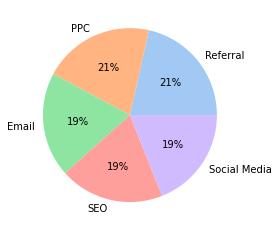

In [21]:
plt.pie(CampaignChannel_count,autopct = '%.0f%%',labels = CampaignChannel_count.index)
plt.show()

样本中各类营销活动渠道的占比几乎均等，Referral和PPC各占21%， Email、SEO、Social Media各占19%。 

### 营销活动的类型的占比

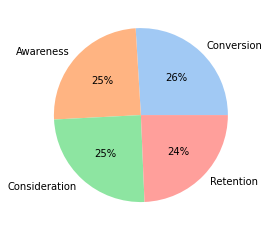

In [22]:
CampaignType_count = cleaned_data["CampaignType"].value_counts()
plt.pie(CampaignType_count,autopct = '%.0f%%',labels = CampaignType_count.index)
plt.show()

样本中这四种类型占比几乎均等，Conversion这个种类占比最大，为26%，Retention最小，为24%，Awareness和Consideration同为25%。

### 客户性别比例

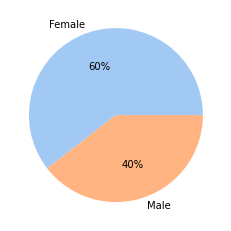

In [23]:
Gender_count = cleaned_data["Gender"].value_counts()
plt.pie(Gender_count,autopct = '%.0f%%',labels = Gender_count.index)
plt.show()

样本客户性别占比符合抽样预期。

### 不同营销活动渠道的花费

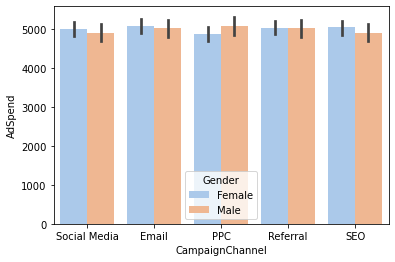

In [24]:
df = pd.DataFrame(cleaned_data)
sns.barplot(x = "CampaignChannel",y = "AdSpend" ,hue = "Gender", data = df)
plt.show()

可以看出，客户在五种营销渠道的花费都在5000美元左右。其中在Social Media、Email、SEO渠道，女性花费多于男性，在PPC渠道，男性花费多于女性，在Rerral渠道，二者几乎一致。

### 不同营销活动渠道对转化率的影响

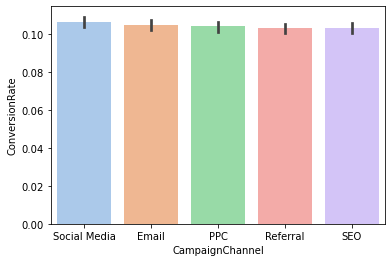

In [25]:
df = pd.DataFrame(cleaned_data)
sns.barplot(x = "CampaignChannel",y = "ConversionRate" , data = df)
plt.show()

可以看出，在Social Media渠道的转化率最大，最有可能产生购买行为，Email次之，在Referral渠道的最小。

### 不同营销活动类型对转化率的影响

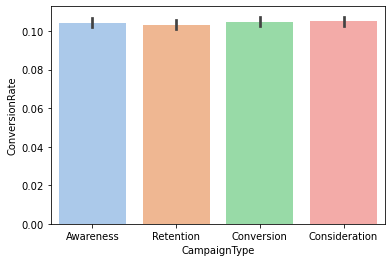

In [26]:
df = pd.DataFrame(cleaned_data)
sns.barplot(x = "CampaignType",y = "ConversionRate" , data = df)
plt.show()

可以看出，在Consideration类活动转化率最大，最有可能产生购买行为，Conversation次之，Retention活动的转化率最小。

## 分析数据

在分析步骤中，我将进行线性回归分析，目标是得到一个根据各个属性对客户转化率预测的数学模型。

In [27]:
import statsmodels.api as sm

In [39]:
lr_cleaned_data = cleaned_data.copy()

In [40]:
lr_cleaned_data = pd.get_dummies(lr_cleaned_data,drop_first = True, columns = ["Gender","CampaignChannel","CampaignType","AdvertisingPlatform","AdvertisingTool"],dtype = int)
lr_cleaned_data

,CustomerID,Age,Income,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,...,LoyaltyPoints,Conversion,Gender_Male,CampaignChannel_PPC,CampaignChannel_Referral,CampaignChannel_SEO,CampaignChannel_Social Media,CampaignType_Consideration,CampaignType_Conversion,CampaignType_Retention
0,8000,56,136912,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,...,688,1,0,0,0,0,1,0,0,0
1,8001,69,41760,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,...,3459,1,1,0,0,0,0,0,0,1
2,8002,46,88456,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,...,2337,1,0,1,0,0,0,0,0,0
3,8003,32,44085,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,...,2463,1,0,1,0,0,0,0,1,0
4,8004,60,83964,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,...,4345,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,15995,21,24849,8518.308575,0.243792,0.116773,23,9.693602,14.227794,70,...,286,0,1,0,0,0,0,0,0,0
7996,15996,43,44718,1424.613446,0.236740,0.190061,49,9.499010,3.501106,52,...,1502,0,0,0,0,1,0,0,0,1
7997,15997,28,125471,4609.534635,0.056526,0.133826,35,2.853241,14.618323,38,...,738,1,0,0,1,0,0,1,0,0
7998,15998,19,107862,9476.106354,0.023961,0.138386,49,1.002964,3.876623,86,...,2709,1,0,1,0,0,0,1,0,0


由于数据里存在分类变量，无法直接建立线性回归模型，需要引入虚拟变量，也就是用0和1分别表示是否属于该分类。

接下来划分因变量和自变量。
因变量是ConversionRate，根据其它可能对转化率有影响的变量来预测转化率。

In [47]:
y = lr_cleaned_data['ConversionRate']

可以把除了CustomerID、AdvertisingPlatform、AdvertisingTool之外的都纳入自变量，但需要查看它们之间的相关性。如果其中有些变量之间相关性很高，会导致共线性。

In [55]:
x = lr_cleaned_data.drop('CustomerID',axis = 1)

一般我们认为，当相关系数的绝对值大于0.8的时候，可能导致严重共线性，所以检查的时候找绝对值大于0.8的即可。

In [58]:
x.corr().abs() > 0.8

,Age,Income,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,...,LoyaltyPoints,Conversion,Gender_Male,CampaignChannel_PPC,CampaignChannel_Referral,CampaignChannel_SEO,CampaignChannel_Social Media,CampaignType_Consideration,CampaignType_Conversion,CampaignType_Retention
Age,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Income,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
AdSpend,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
ClickThroughRate,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
ConversionRate,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
WebsiteVisits,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
PagesPerVisit,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
TimeOnSite,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
SocialShares,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
EmailOpens,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


从以上输出来看，不同变量之间相关系数的绝对值均小于或等于0.8。